In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Data Description



**Input variables (based on physicochemical tests):**

1. **Fixed acidity** : most acids involved with wine or fixed or nonvolatile (do not evaporate readily).
2. **volatile acidity** : the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.
3. **citric acid** : found in small quantities, citric acid can add 'freshness' and flavor to wines.
4. **residual sugar** : the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.
5. **chlorides** : the amount of salt in the wine.
6. **free sulfur dioxide** : the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.
7. **total sulfur dioxide** : amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.
8. **density** : the density of water is close to that of water depending on the percent alcohol and sugar content.
9. **pH** : describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.
10. **sulphates** : a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant.
11. **alcohol** : the percent alcohol content of the wine.


**Output variable (based on sensory data):**

12. **quality**: score between 0 and 10 given by human wine tasters.

#Data Loading

In [ ]:
wine = pd.read_csv('/content/winequality-red.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#Data Cleaning

In [ ]:
#cek missing value
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#cek data duplikat
len(wine.drop_duplicates()) / len(wine)

0.849906191369606

In [ ]:
#drop data duplikat
wine = wine.drop_duplicates()
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [ ]:
len(wine.drop_duplicates()) / len(wine)

1.0

Tidak ada missing value pada data set tersebut, tetapi ada data yang duplikat dikarenakan hasil output sintax duplikat bukan 1. Data yang duplikat tersebut akan di drop.

#EDA

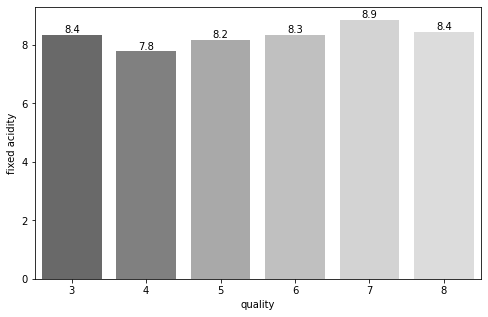

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(x='quality', y='fixed acidity', data=wine, palette = ['dimgray','gray','darkgray','silver','lightgray','gainsboro'], ci=None)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.show()

Dari hasil grafik diatas Fixed Acidity tidak terlalu mempengaruhi kualitas wine tersebut, karna nilai Fixed Acidity pada wine kualitas rendah dengan yang berkualitas bagus hampir sama.

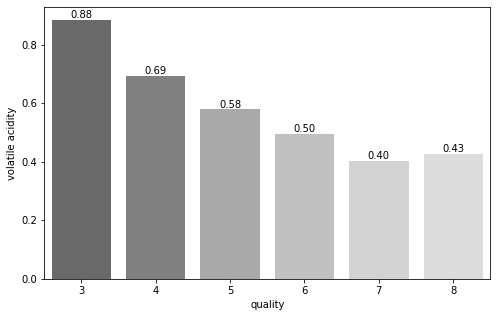

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(x='quality', y='volatile acidity', data=wine, palette = ['dimgray','gray','darkgray','silver','lightgray','gainsboro'], ci=None)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.show()

Pada grafik diatas dapat dilihat kandungan Volatile Acidity pada wine bisa dibilang cukup berpengaruh, semakin rendah nilainya maka kualitas wine semakin bagus. 

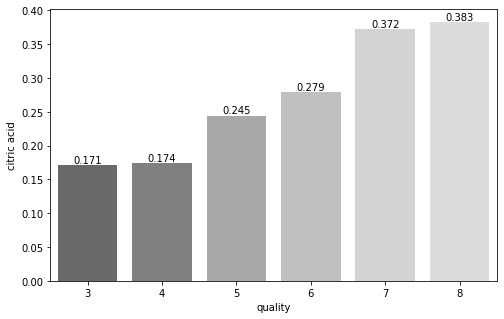

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(x='quality', y='citric acid', data=wine, palette = ['dimgray','gray','darkgray','silver','lightgray','gainsboro'], ci=None)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.show()

Kandungan citric acid pada wine juga dapat mempengaruhi kualitas wine tersebut, semakin tinggi kandunganya maka kualitas wine akan lebih bagus.

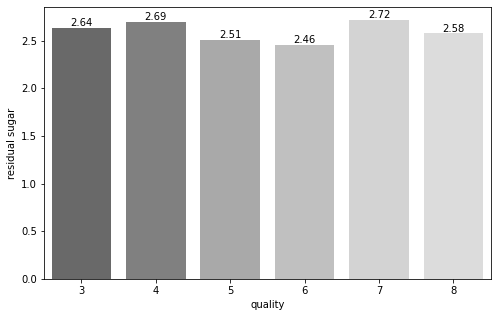

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(x='quality', y='residual sugar', data=wine, palette = ['dimgray','gray','darkgray','silver','lightgray','gainsboro'], ci=None)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.show()

Kandungan residual sugar tidak mempengaruhi kualitas wine.

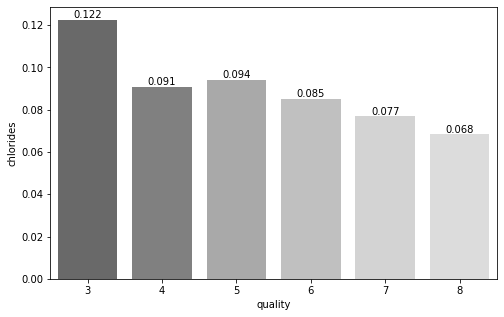

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(x='quality', y='chlorides', data=wine, palette = ['dimgray','gray','darkgray','silver','lightgray','gainsboro'], ci=None)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.show()

Kandungan Chloridas pada wine mempengaruhi kualitas wine, semakin rendah nilainya maka kualitas wine tersebut bisa dikatakan bagus.

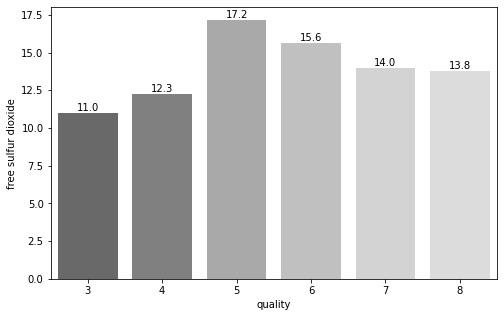

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(x='quality', y='free sulfur dioxide', data=wine, palette = ['dimgray','gray','darkgray','silver','lightgray','gainsboro'], ci=None)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.show()

Kandungan Free Sulfur Dioxide tidak terlalu mempengaruhi kualitas wine.

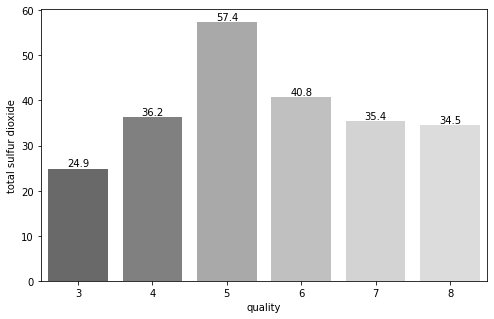

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(x='quality', y='total sulfur dioxide', data=wine, palette = ['dimgray','gray','darkgray','silver','lightgray','gainsboro'], ci=None)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.show()

Kandungan Total Sulfur Dioxide juga tidak terlalu mempengaruhi kualitas wine.

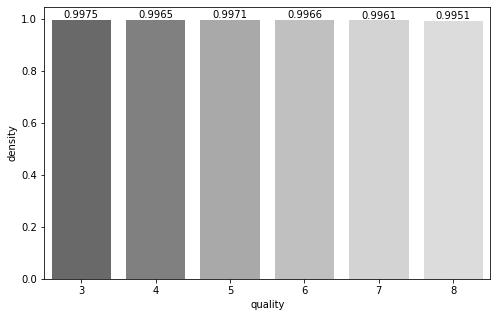

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(x='quality', y='density', data=wine, palette = ['dimgray','gray','darkgray','silver','lightgray','gainsboro'], ci=None)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.show()

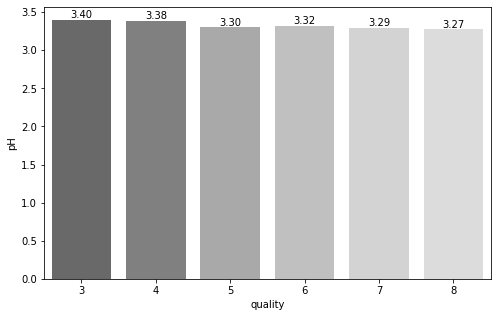

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(x='quality', y='pH', data=wine, palette = ['dimgray','gray','darkgray','silver','lightgray','gainsboro'], ci=None)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.show()

Nilai pH pada wine mempengaruhi kualitas wine tersebut, semakin rendah nilainya semakin bagus kualitas winenya.

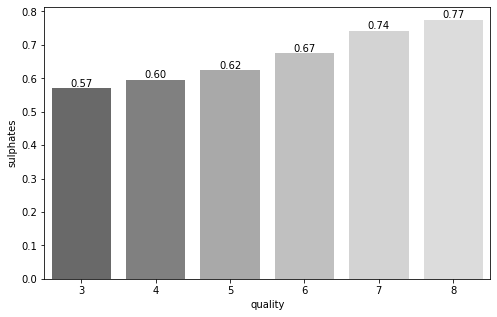

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(x='quality', y='sulphates', data=wine, palette = ['dimgray','gray','darkgray','silver','lightgray','gainsboro'], ci=None)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.show()

Kandungan Sulphates sangat mempengaruhi kualitas wine tersebut, semakin tinggi nilainya semakin bagus kualitas winenya

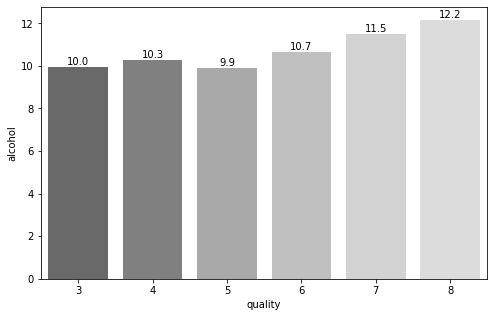

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(x='quality', y='alcohol', data=wine, palette = ['dimgray','gray','darkgray','silver','lightgray','gainsboro'], ci=None)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.show()

Kadar Alcohol pada wine juga mempengaruh kualitas wine tersebut, semakin tinggi nilainya semakin bagus kualitas wine tersebut.

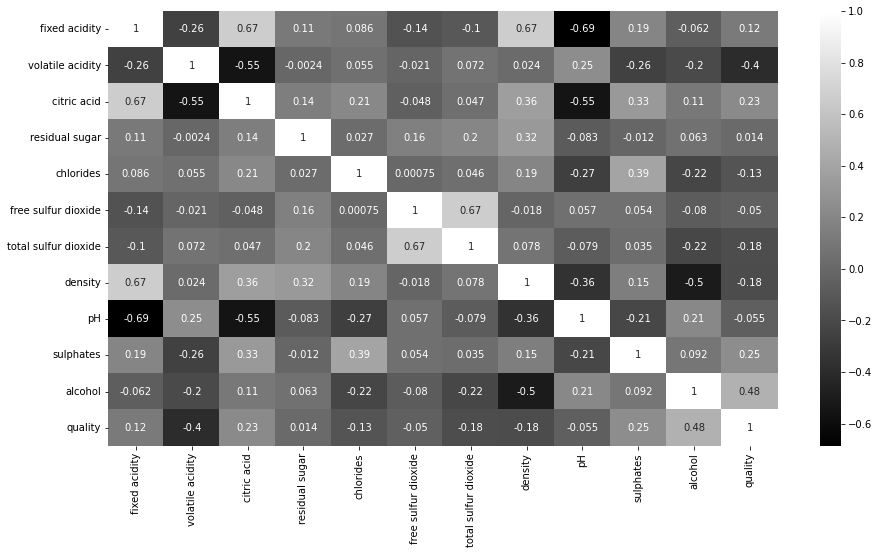

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(wine.corr(), annot=True, cmap='gray')
plt.show()

Korelasi yang paling kuat terhadap kualitas wine tersebut adalah alcohol, sedangkan yang paling rendah adalah residual sugar.

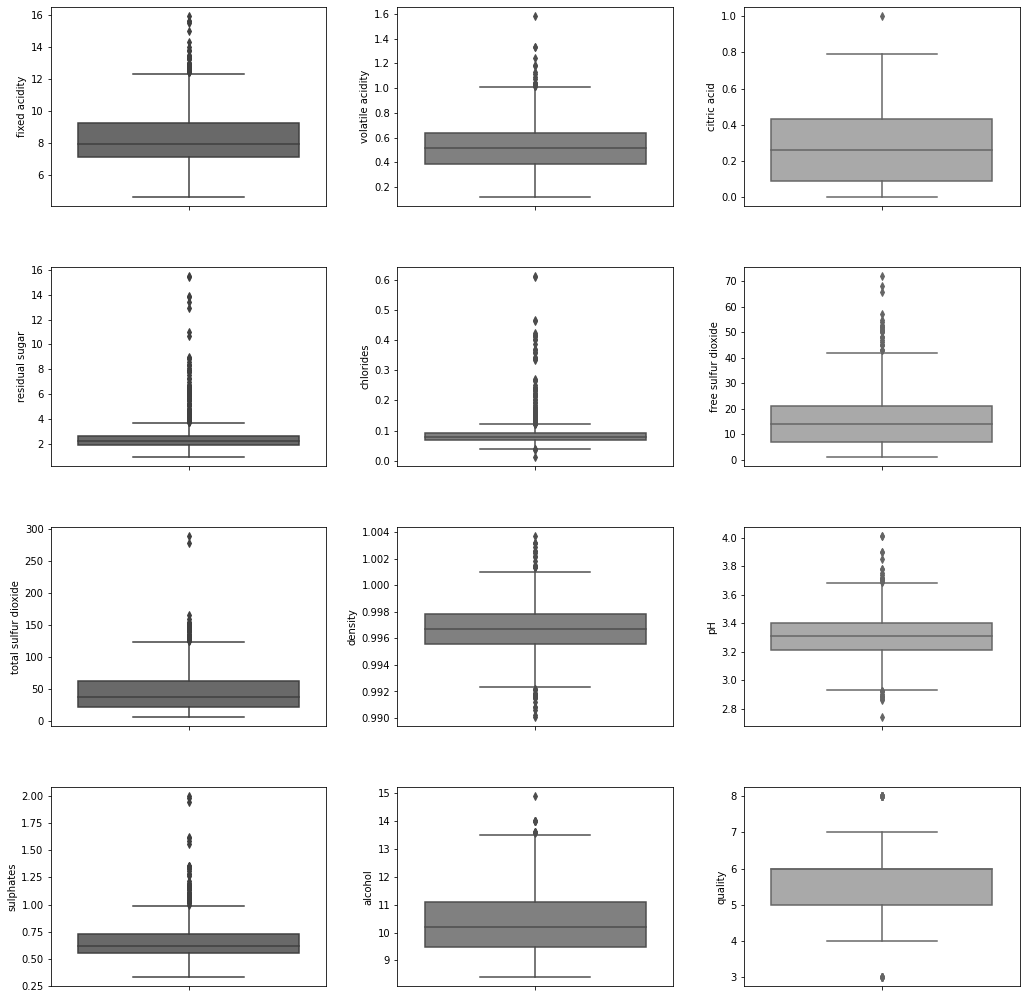

In [ ]:
def plotBoxplot(wine):
    fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(15,15))
    fig.tight_layout(pad=4.0)

    col = 0
    row = 0
    colors = ['dimgray','gray','darkgray']

    for i, column in enumerate(wine.columns):
        sns.boxplot(y=column, data=wine, ax=axes[row][col], color=colors[col])

        if (i + 1) % 3 == 0:
            row += 1
            col = 0
        else:
            col += 1
            
plotBoxplot(wine)
plt.savefig('line plot.jpg',bbox_inches='tight', dpi=150)

#Preprocessing Data

In [ ]:
wine['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [ ]:
#Feature Engineering
bins = (1, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
wine['quality'].value_counts()

bad     1175
good     184
Name: quality, dtype: int64

In [ ]:
#Manipulation data
label_encoder = preprocessing.LabelEncoder()
wine['quality']= label_encoder.fit_transform(wine['quality'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Mengubah parameter kolon Quality menjadi Good (kualitas wine yang diatas 6.5) dan Bad (kualitas wine dibawah 6.5) dan mengubahnya menjadi 0 (Bad) dan 1 (Good).

In [ ]:
#Split data
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#KNN

In [ ]:
knn_clf = KNeighborsClassifier()

In [ ]:
parameters = {
    'n_neighbors': (2,3,4,5,6,7,8)
}

knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='recall')
knn_clf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8)},
             scoring='recall')

In [ ]:
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 2},0.200000,6
1,{'n_neighbors': 3},0.353333,1
2,{'n_neighbors': 4},0.193333,7
3,{'n_neighbors': 5},0.313333,3
4,{'n_neighbors': 6},0.233333,4
5,{'n_neighbors': 7},0.326667,2
6,{'n_neighbors': 8},0.206667,5


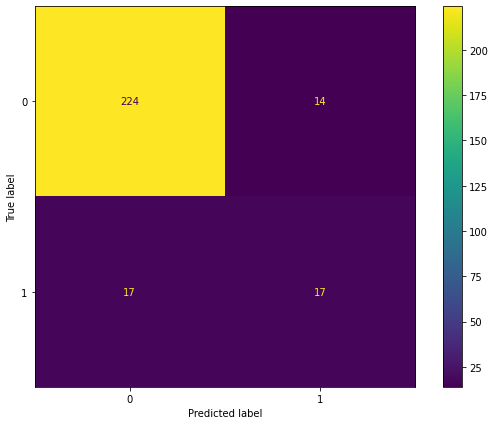

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=knn_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       238
           1       0.55      0.50      0.52        34

    accuracy                           0.89       272
   macro avg       0.74      0.72      0.73       272
weighted avg       0.88      0.89      0.88       272



#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

rf_clf_randomcv = RandomizedSearchCV(rf_clf, parameters, cv=5, 
                                     scoring='recall', n_iter=10)
rf_clf_randomcv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   param_distributions={'max_depth': (1, 2, 3, 4, 5),
                                        'n_estimators': (10, 20, 30, 40, 50)},
                   scoring='recall')

In [ ]:
cv_result = pd.DataFrame(rf_clf_randomcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
6,"{'n_estimators': 30, 'max_depth': 5}",0.193333,1
9,"{'n_estimators': 20, 'max_depth': 4}",0.193333,1
5,"{'n_estimators': 10, 'max_depth': 4}",0.180000,3
3,"{'n_estimators': 30, 'max_depth': 4}",0.166667,4
8,"{'n_estimators': 10, 'max_depth': 3}",0.133333,5
1,"{'n_estimators': 40, 'max_depth': 3}",0.093333,6
7,"{'n_estimators': 10, 'max_depth': 2}",0.006667,7
0,"{'n_estimators': 40, 'max_depth': 1}",0.000000,8
2,"{'n_estimators': 30, 'max_depth': 1}",0.000000,8
4,"{'n_estimators': 50, 'max_depth': 2}",0.000000,8


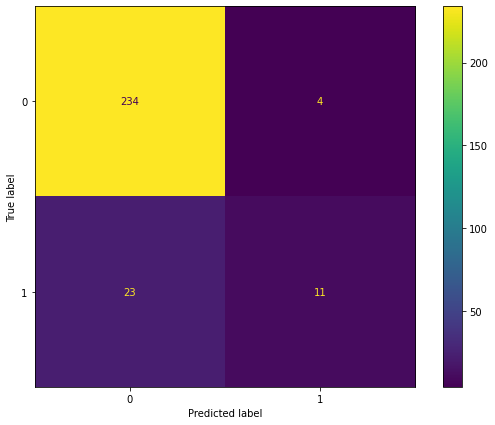

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_randomcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_randomcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_randomcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_pred = rf_clf_randomcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       238
           1       0.73      0.32      0.45        34

    accuracy                           0.90       272
   macro avg       0.82      0.65      0.70       272
weighted avg       0.89      0.90      0.88       272



#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'min_samples_split' : range(10,500,20),
    'max_depth': range(1,20,2)
}

dt_clf_randomcv = RandomizedSearchCV(dt_clf, parameters, cv=5, 
                                     scoring='recall')
dt_clf_randomcv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
                   param_distributions={'max_depth': range(1, 20, 2),
                                        'min_samples_split': range(10, 500, 20)},
                   scoring='recall')

In [ ]:
cv_result = pd.DataFrame(dt_clf_randomcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
0,"{'min_samples_split': 70, 'max_depth': 5}",0.306667,1
1,"{'min_samples_split': 30, 'max_depth': 9}",0.300000,2
4,"{'min_samples_split': 130, 'max_depth': 13}",0.226667,3
8,"{'min_samples_split': 190, 'max_depth': 15}",0.140000,4
2,"{'min_samples_split': 250, 'max_depth': 17}",0.000000,5
3,"{'min_samples_split': 310, 'max_depth': 1}",0.000000,5
5,"{'min_samples_split': 470, 'max_depth': 19}",0.000000,5
6,"{'min_samples_split': 370, 'max_depth': 7}",0.000000,5
7,"{'min_samples_split': 350, 'max_depth': 5}",0.000000,5
9,"{'min_samples_split': 270, 'max_depth': 3}",0.000000,5


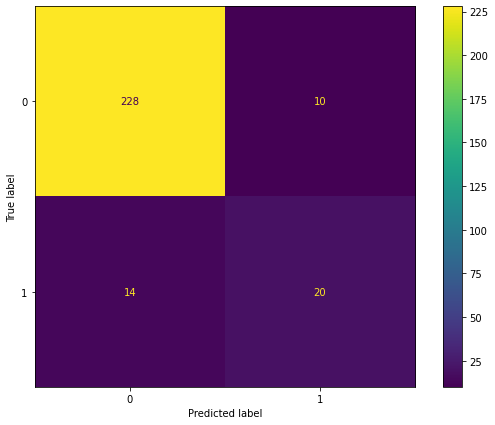

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = dt_clf_randomcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=dt_clf_randomcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=dt_clf_randomcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_pred = dt_clf_randomcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       238
           1       0.67      0.59      0.62        34

    accuracy                           0.91       272
   macro avg       0.80      0.77      0.79       272
weighted avg       0.91      0.91      0.91       272



#Conclusion

Dari hasil EDA dapat di simpulan ada beberapa kandungan yang mempengaruhi kualitas wine, dan ada juga yang tidak terlalu berpengaruh. 

Adapun parameter kandungan yang tidak terlalu mempengaruhi kualitas wine adalah = 

1.  Fixed Acidity
2.  Residual Sugar
3.  Free Sulfur Dioxide
4.  Total Sulfur Dioxide
5.  Density

**Saran =**
Jika ingin membuat wine dan memiliki kualitas yang bagus bisa di coba mempertimbangkan parameter kandungan yang mempengaruhi kualitas wine yaitu =  

1.  **Volatile Acidity** = Semakin rendah nilainya semakin bagus, jika terlalu tinggi dapat menyebabkan rasa cuka yang tidak enak pada wine Asam sitrat dapat menambah 'kesegaran' dan rasa pada anggur. 
2.  **Citric Acid** = Semakin tinggi kandunganya semakin bagus, Rekomendai nilai kadar citric acid terbaik untuk wine ada dikisaran 6–8 g/L.
3.  **Chlorides** = Semakin rendah semakin bagus. 
4.  **pH** = Semakin rendah semakin bagus. Rekomendai nilai pH terbaik untuk wine ada dikisaran 3-4.
5.  **Sulphates** = Semakin tinggi semakin bagus.
6.  **Alcohol** = Semakin tinggi semakin bagus.

Machine Learning menggunakan 3 pemodelan alogaritma supervised leearning yaitu KNN, Random Forest, dan Decision Tree. Dikarenakan data target imbalance maka score yang digunakan saat pemodelan adalah recall. Dan dari hasil metriks ketiga pemodelan tersebut hasil Recall yang terbaik adalah = 
1. Decision Tree = 0.59
2. KNN = 0.50
3. Random Forest = 0.32